In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
!pip install dython
from dython import nominal

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
!pip install xgboost
import xgboost as xgb

!pip install lightgbm
import lightgbm as lgb

from sklearn.metrics import mean_squared_error
import sklearn.metrics as sm

# DATASET  

## Exploration and Preprocessing

### Dataset Cleaning Activities:
- dropping 'Link' column as it is not needed for price prediction 
- dropping 'Condition' column as all cars are used 
- dropping any row with no price as it is the target feature 
- converting 'Price' column type to float
- drop NAs

In [2]:
#read dataset
#https://www.kaggle.com/turkibintalib/saudi-arabia-used-cars-dataset/version/3?select=UsedCarsSA_Unclean_EN.csv
df = pd.read_csv("UsedCarsSA_Unclean_EN.csv")

In [3]:
df

,Link,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price,Negotiable
0,https://syarah.com/%D9%83%D8%B1%D8%A7%D9%8A%D8...,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,Used,103000,Riyadh,114000,False
1,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,Used,5448,Riyadh,Negotiable,True
2,https://syarah.com/online/%D9%86%D9%8A%D8%B3%D...,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,Used,72418,Riyadh,27500,False
3,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,Used,114154,Riyadh,43000,False
4,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,Used,41912,Riyadh,59500,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8243,https://syarah.com/%D9%84%D9%84%D8%A8%D9%8A%D8...,Audi,A6,2015,Saudi,Silver,Full,NaN,Gas,Automatic,Used,77000,Riyadh,75000,False
8244,https://syarah.com/%D9%84%D9%84%D8%A8%D9%8A%D8...,Chevrolet,Camaro,2010,Saudi,Silver,Full,NaN,Gas,Automatic,Used,150000,Riyadh,53000,False
8245,https://syarah.com/%D8%AA%D9%88%D9%8A%D9%88%D8...,Toyota,Land Cruiser,2013,Gulf Arabic,White,Full,NaN,Gas,Automatic,Used,260,Najran,Negotiable,True
8246,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,Used,18500,Aseer,22000,False


In [4]:
df.describe()

,Year,Engine_Size,Mileage
count,8248.000000,5982.000000,8.248000e+03
mean,2014.014064,3.175794,1.494128e+05
std,5.935349,1.567480,3.455258e+05
min,1936.000000,1.000000,1.000000e+02
25%,2012.000000,2.000000,3.700000e+04
50%,2016.000000,2.700000,1.016575e+05
75%,2018.000000,4.000000,1.955520e+05
max,2022.000000,9.000000,2.000000e+07


In [5]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8248 entries, 0 to 8247
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Link         8248 non-null   object 
 1   Make         8248 non-null   object 
 2   Type         8248 non-null   object 
 3   Year         8248 non-null   int64  
 4   Origin       8153 non-null   object 
 5   Color        8248 non-null   object 
 6   Options      8139 non-null   object 
 7   Engine_Size  5982 non-null   float64
 8   Fuel_Type    8248 non-null   object 
 9   Gear_Type    8174 non-null   object 
 10  Condition    8248 non-null   object 
 11  Mileage      8248 non-null   int64  
 12  Region       8248 non-null   object 
 13  Price        8248 non-null   object 
 14  Negotiable   8248 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(11)
memory usage: 910.3+ KB


In [6]:
#Dropping unneeded columns
df = df.drop(['Link','Condition'],axis=1)
df

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,Negotiable,True
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8243,Audi,A6,2015,Saudi,Silver,Full,NaN,Gas,Automatic,77000,Riyadh,75000,False
8244,Chevrolet,Camaro,2010,Saudi,Silver,Full,NaN,Gas,Automatic,150000,Riyadh,53000,False
8245,Toyota,Land Cruiser,2013,Gulf Arabic,White,Full,NaN,Gas,Automatic,260,Najran,Negotiable,True
8246,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,18500,Aseer,22000,False


In [7]:
#Dropping rows with no price value
df = df.drop(df[df['Price']=='Negotiable'].index)

In [8]:
df.groupby('Negotiable').nunique()

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
Negotiable,,,,,,,,,,,,
False,62,390,48,3,15,3,69,3,2,1730,27,548


In [9]:
#Dropping 'Negotiable' column as all its value is 'False'
df = df.drop(['Negotiable'],axis=1)
df

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500
5,Honda,Accord,2018,Saudi,Navy,Full,1.5,Gas,Automatic,39000,Riyadh,72000
...,...,...,...,...,...,...,...,...,...,...,...,...
8242,Kia,Sorento,2006,Saudi,Navy,Full,3.5,Gas,Manual,257000,Dammam,15000
8243,Audi,A6,2015,Saudi,Silver,Full,NaN,Gas,Automatic,77000,Riyadh,75000
8244,Chevrolet,Camaro,2010,Saudi,Silver,Full,NaN,Gas,Automatic,150000,Riyadh,53000
8246,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,18500,Aseer,22000


In [10]:
#Converting 'Price' to float
df['Price'] = df['Price'].astype(float)
df

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000.0
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500.0
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000.0
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500.0
5,Honda,Accord,2018,Saudi,Navy,Full,1.5,Gas,Automatic,39000,Riyadh,72000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8242,Kia,Sorento,2006,Saudi,Navy,Full,3.5,Gas,Manual,257000,Dammam,15000.0
8243,Audi,A6,2015,Saudi,Silver,Full,NaN,Gas,Automatic,77000,Riyadh,75000.0
8244,Chevrolet,Camaro,2010,Saudi,Silver,Full,NaN,Gas,Automatic,150000,Riyadh,53000.0
8246,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,18500,Aseer,22000.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5652 entries, 0 to 8247
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         5652 non-null   object 
 1   Type         5652 non-null   object 
 2   Year         5652 non-null   int64  
 3   Origin       5625 non-null   object 
 4   Color        5652 non-null   object 
 5   Options      5611 non-null   object 
 6   Engine_Size  4425 non-null   float64
 7   Fuel_Type    5652 non-null   object 
 8   Gear_Type    5633 non-null   object 
 9   Mileage      5652 non-null   int64  
 10  Region       5652 non-null   object 
 11  Price        5652 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 574.0+ KB


In [12]:
df.describe()

,Year,Engine_Size,Mileage,Price
count,5652.000000,4425.000000,5.652000e+03,5.652000e+03
mean,2014.788217,3.089695,1.401082e+05,7.853659e+04
std,5.220691,1.486054,3.340451e+05,7.607374e+04
min,1963.000000,1.000000,1.000000e+02,0.000000e+00
25%,2013.000000,2.000000,4.648450e+04,3.500000e+04
50%,2016.000000,2.700000,1.010000e+05,5.800000e+04
75%,2018.000000,4.000000,1.810000e+05,9.500000e+04
max,2021.000000,9.000000,2.000000e+07,1.150000e+06


In [13]:
df.groupby('Options').nunique()

,Make,Type,Year,Origin,Color,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
Options,,,,,,,,,,,
Full,55,294,40,3,15,65,3,2,789,26,392
Semi Full,42,212,31,3,15,53,3,2,687,25,290
Standard,43,208,40,3,15,48,3,2,958,26,302


In [14]:
#check for NAs
df.isna().sum()

Make              0
Type              0
Year              0
Origin           27
Color             0
Options          41
Engine_Size    1227
Fuel_Type         0
Gear_Type        19
Mileage           0
Region            0
Price             0
dtype: int64

In [15]:
#Drop all NAs
df=df.dropna()

In [16]:
df.isna().sum()

Make           0
Type           0
Year           0
Origin         0
Color          0
Options        0
Engine_Size    0
Fuel_Type      0
Gear_Type      0
Mileage        0
Region         0
Price          0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4423 entries, 0 to 8247
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         4423 non-null   object 
 1   Type         4423 non-null   object 
 2   Year         4423 non-null   int64  
 3   Origin       4423 non-null   object 
 4   Color        4423 non-null   object 
 5   Options      4423 non-null   object 
 6   Engine_Size  4423 non-null   float64
 7   Fuel_Type    4423 non-null   object 
 8   Gear_Type    4423 non-null   object 
 9   Mileage      4423 non-null   int64  
 10  Region       4423 non-null   object 
 11  Price        4423 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 449.2+ KB


In [18]:
#Drop any duplicates
df.drop_duplicates()
df

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000.0
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500.0
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000.0
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500.0
5,Honda,Accord,2018,Saudi,Navy,Full,1.5,Gas,Automatic,39000,Riyadh,72000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8240,Ford,Edge,2013,Saudi,Black,Standard,6.0,Gas,Automatic,277000,Najran,30000.0
8241,Kia,Cadenza,2012,Saudi,Black,Standard,3.6,Gas,Automatic,147000,Riyadh,25000.0
8242,Kia,Sorento,2006,Saudi,Navy,Full,3.5,Gas,Manual,257000,Dammam,15000.0
8246,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,18500,Aseer,22000.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4423 entries, 0 to 8247
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         4423 non-null   object 
 1   Type         4423 non-null   object 
 2   Year         4423 non-null   int64  
 3   Origin       4423 non-null   object 
 4   Color        4423 non-null   object 
 5   Options      4423 non-null   object 
 6   Engine_Size  4423 non-null   float64
 7   Fuel_Type    4423 non-null   object 
 8   Gear_Type    4423 non-null   object 
 9   Mileage      4423 non-null   int64  
 10  Region       4423 non-null   object 
 11  Price        4423 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 449.2+ KB


In [20]:
df.corr()

,Year,Engine_Size,Mileage,Price
Year,1.000000,-0.214678,-0.317844,0.283967
Engine_Size,-0.214678,1.000000,0.096385,0.338784
Mileage,-0.317844,0.096385,1.000000,-0.186297
Price,0.283967,0.338784,-0.186297,1.000000


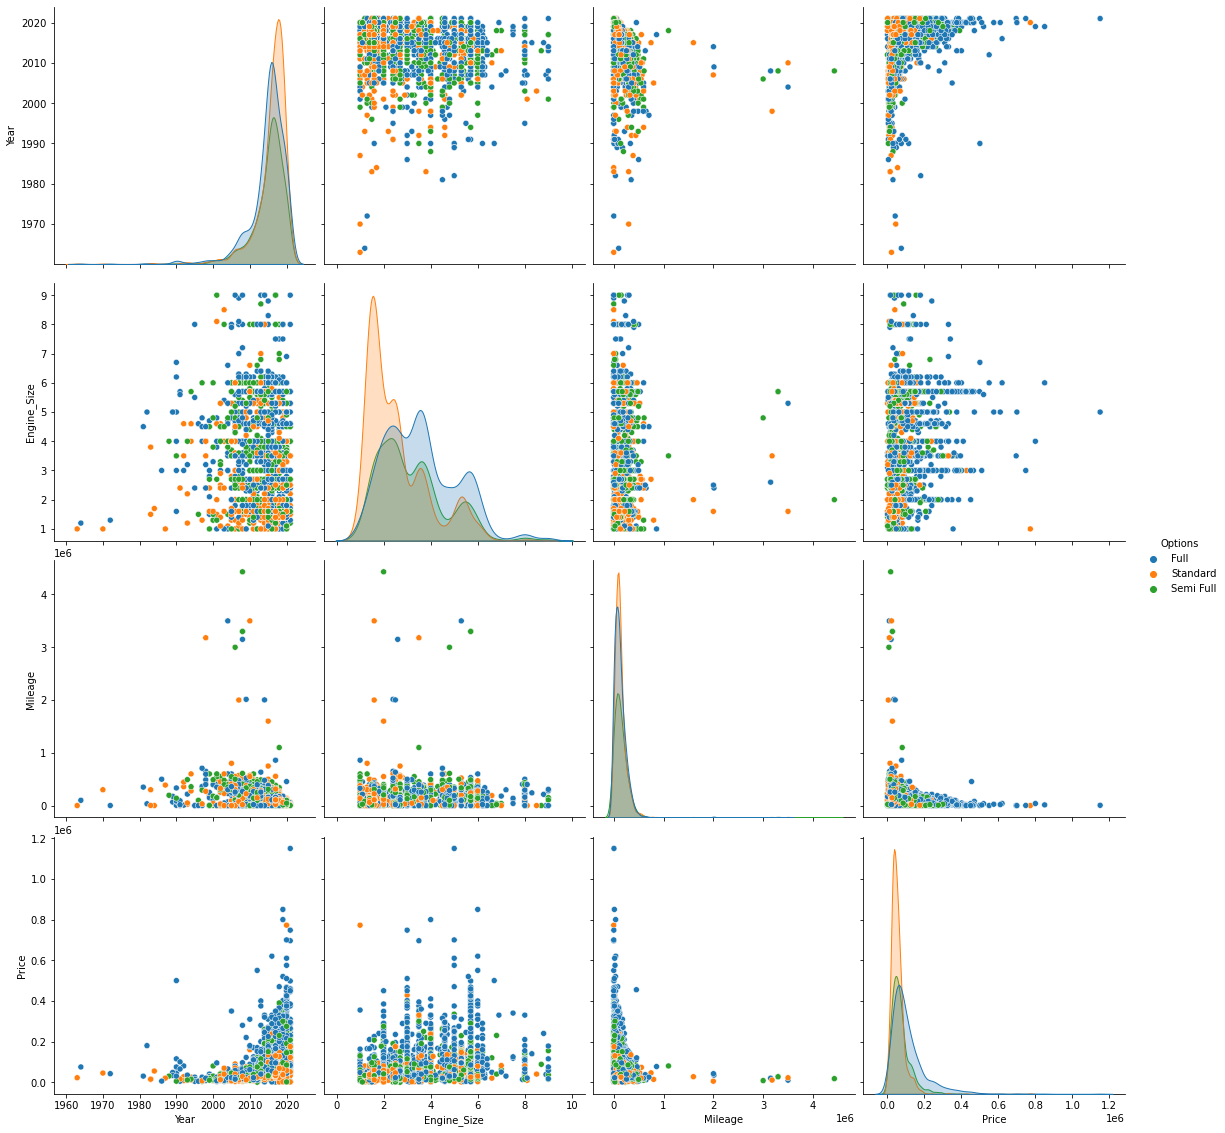

In [21]:
sns.pairplot(df,hue='Options', height=4);

<function matplotlib.pyplot.show(close=None, block=None)>

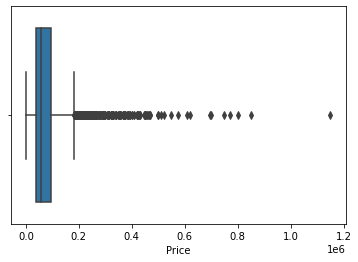

In [22]:
sns.boxplot(x=df['Price'])
plt.show

In [23]:
IQR_Price = df['Price'].quantile(.75)-df['Price'].quantile(.25)
IQR_Price

58500.0

In [24]:
Price_lower = df['Price'].quantile(.25) - 1.5*IQR_Price
Price_upper = df['Price'].quantile(.75) - 1.5*IQR_Price

In [25]:
print(Price_lower,Price_upper)

-51250.0 7250.0


In [26]:
outliers_15_low_price = (df['Price']<Price_lower)
outliers_15_up_price =(df['Price']>Price_upper)
len(df['Price']) - (len (df['Price'][outliers_15_up_price])+len (df['Price'][outliers_15_low_price]))


92

In [27]:
len (df['Price'][outliers_15_up_price])

4331

/Users/tasneem/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='Price'>

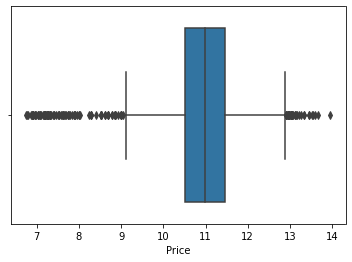

In [28]:
df_Price_log = np.log(df['Price'])
sns.boxplot (x=df_Price_log)

In [29]:
df_Price_log.head(10)


0     11.643954
2     10.221941
3     10.668955
4     10.993732
5     11.184421
6     11.429544
8     11.289782
9     10.373491
10    10.819778
11    11.813030
Name: Price, dtype: float64

In [30]:
df['Price'].head(10)

0     114000.0
2      27500.0
3      43000.0
4      59500.0
5      72000.0
6      92000.0
8      80000.0
9      32000.0
10     50000.0
11    135000.0
Name: Price, dtype: float64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4423 entries, 0 to 8247
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         4423 non-null   object 
 1   Type         4423 non-null   object 
 2   Year         4423 non-null   int64  
 3   Origin       4423 non-null   object 
 4   Color        4423 non-null   object 
 5   Options      4423 non-null   object 
 6   Engine_Size  4423 non-null   float64
 7   Fuel_Type    4423 non-null   object 
 8   Gear_Type    4423 non-null   object 
 9   Mileage      4423 non-null   int64  
 10  Region       4423 non-null   object 
 11  Price        4423 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 449.2+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

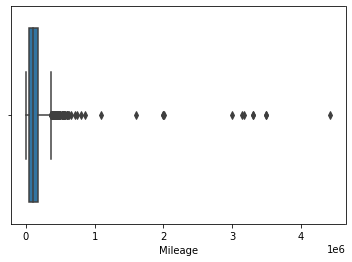

In [33]:
sns.boxplot(x=df['Mileage'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

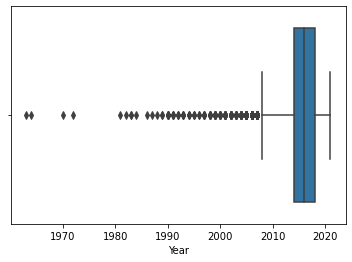

In [34]:
sns.boxplot(x=df['Year'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

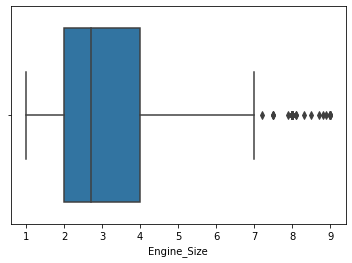

In [35]:
sns.boxplot(x=df['Engine_Size'])
plt.show

In [36]:
df['Make'].unique()

array(['Chrysler', 'Nissan', 'Hyundai', 'Honda', 'Toyota', 'Chevrolet',
       'Mercedes', 'MINI', 'Lexus', 'Land Rover', 'GMC', 'Mazda', 'Ford',
       'Kia', 'Genesis', 'Cadillac', 'MG', 'Jeep', 'INFINITI', 'Dodge',
       'Ferrari', 'Great Wall', 'Jaguar', 'GAC', 'Renault', 'Suzuki',
       'Peugeot', 'Changan', 'Geely', 'HAVAL', 'BMW', 'Rolls-Royce',
       'Porsche', 'Mitsubishi', 'Subaru', 'Zhengzhou', 'Lincoln', 'FAW',
       'Chery', 'Isuzu', 'Audi', 'Bentley', 'Aston Martin', 'Daihatsu',
       'Volkswagen', 'Fiat', 'Mercury', 'Classic', 'Hummer', 'BYD',
       'Maserati', 'Other', 'Lifan', 'Foton', 'Victory Auto', 'Škoda',
       'Iveco'], dtype=object)

In [37]:
df['Year'].unique()

array([2018, 2019, 2011, 2017, 2014, 2016, 2021, 2020, 2015, 2013, 2008,
       2009, 2012, 2010, 2006, 2007, 1992, 2005, 1984, 2000, 2002, 2004,
       1998, 1982, 1994, 2001, 1997, 1999, 1990, 1995, 1989, 1993, 1988,
       1987, 2003, 1964, 1963, 1991, 1981, 1996, 1983, 1972, 1970, 1986])

In [38]:
df['Type'].unique()

array(['C300', 'Sunny', 'Elantra', 'Accord', 'Land Cruiser', 'Impala',
       'Yaris', 'Camry', 'Patrol', 'Tahoe', 'E', 'Accent', 'Corolla',
       'Copper', 'Prado', 'Civic', 'Furniture', 'RX', 'Range Rover',
       'Yukon', 'Bus Urvan', 'Aurion', 'Malibu', 'Rav4', 'CX9',
       'Expedition', 'ES', 'Cadenza', 'Tucson', 'Platinum', 'G80',
       'Sonata', 'LX', 'GX', 'Azera', 'CT-S', 'ZS', 'Kona',
       'Grand Cherokee', 'S', 'M', 'Charger', 'Taurus', 'GTB 599 Fiorano',
       'Royal', 'Picanto', 'Power', 'F-Pace', 'Hilux', 'FJ', 'Senta fe',
       'Optima', 'GS8', 'Maxima', 'Caprice', 'Challenger', 'Datsun',
       'Camaro', 'Symbol', 'Fluence', '6', 'RX5', 'Avalon', 'APV', '3008',
       'Cerato', 'Traverse', 'F150', 'Genesis', 'NX', 'C', 'G70', 'Flex',
       'UX', 'Cores', 'Creta', 'Rio', 'Odyssey', 'Sylvian Bus', 'Ciocca',
       'Land Cruiser Pickup', 'Duster', 'Seven', 'EC8', 'H6', '300',
       'The 7', 'Explorer', 'Spark', 'Z370', 'Victoria', 'Ghost', '911',
       'Carnival'

In [39]:
len(df['Type'].unique())

351

In [40]:
df['Region'].unique()

array(['Riyadh', 'Jeddah', 'Dammam', 'Al-Medina', 'Qassim', 'Makkah',
       'Jazan', 'Aseer', 'Al-Ahsa', 'Taef', 'Sabya', 'Khobar', 'Al-Baha',
       'Tabouk', 'Yanbu', 'Hail', 'Jubail', 'Abha', 'Hafar Al-Batin',
       'Najran', 'Arar', 'Al-Namas', 'Al-Jouf', 'Qurayyat', 'Sakaka',
       'Wadi Dawasir', 'Besha'], dtype=object)

In [41]:
df[df['Make']=='Other']

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
3078,Other,Other,2019,Other,White,Full,8.0,Diesel,Manual,24643,Qassim,330000.0
5115,Other,Other,2007,Saudi,Red,Standard,3.5,Gas,Manual,125,Qassim,7000.0
5530,Other,Other,2019,Saudi,Brown,Full,1.0,Gas,Manual,4000,Jeddah,39000.0
5715,Other,Other,2021,Other,Yellow,Semi Full,1.2,Gas,Manual,3000,Jeddah,5500.0
6866,Other,Other,2020,Other,Black,Standard,1.1,Gas,Manual,2848,Al-Baha,2000.0
7812,Other,Other,2011,Other,Black,Full,1.8,Gas,Manual,33000,Al-Medina,50000.0


In [42]:
df[df['Type']=='Other']

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
1157,Ford,Other,1982,Other,Bronze,Full,5.0,Gas,Automatic,34000,Dammam,180000.0
1280,Mitsubishi,Other,2006,Saudi,White,Standard,2.5,Diesel,Manual,140000,Al-Medina,45000.0
1497,Honda,Other,2009,Saudi,Orange,Full,1.0,Gas,Manual,32743,Jeddah,27500.0
2898,Honda,Other,2011,Saudi,Black,Standard,1.0,Gas,Manual,4200,Jeddah,6500.0
3078,Other,Other,2019,Other,White,Full,8.0,Diesel,Manual,24643,Qassim,330000.0
3209,Ford,Other,2013,Gulf Arabic,Blue,Semi Full,3.0,Gas,Automatic,318000,Riyadh,40000.0
3989,Geely,Other,2017,Saudi,Blue,Full,1.4,Gas,Automatic,45000,Riyadh,36000.0
4007,Hyundai,Other,2012,Saudi,Black,Full,2.4,Gas,Automatic,3330,Aseer,25000.0
4237,Ford,Other,2016,Saudi,Another Color,Full,3.2,Gas,Automatic,15500,Riyadh,90000.0
4238,Ford,Other,1963,Saudi,Blue,Standard,1.0,Gas,Manual,300,Riyadh,22000.0


In [43]:
#drop any record with Make = 'Other' OR Type = 'Other'
df = df.drop(df[df['Make']=='Other'].index)
df = df.drop(df[df['Type']=='Other'].index)
df

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000.0
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500.0
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000.0
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500.0
5,Honda,Accord,2018,Saudi,Navy,Full,1.5,Gas,Automatic,39000,Riyadh,72000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8239,Mitsubishi,Lancer,2009,Other,Grey,Standard,1.6,Gas,Automatic,222835,Riyadh,11500.0
8240,Ford,Edge,2013,Saudi,Black,Standard,6.0,Gas,Automatic,277000,Najran,30000.0
8241,Kia,Cadenza,2012,Saudi,Black,Standard,3.6,Gas,Automatic,147000,Riyadh,25000.0
8242,Kia,Sorento,2006,Saudi,Navy,Full,3.5,Gas,Manual,257000,Dammam,15000.0


In [44]:
df.groupby(['Make','Type','Year']).nunique()

Origin  Color  Options  Engine_Size  Fuel_Type  \
Make         Type     Year                                                   
Aston Martin DB9      2010       1      1        1            1          1   
             Vanquish 2013       1      1        1            1          1   
             Vantage  2012       1      1        1            1          1   
Audi         A3       2016       1      1        1            2          1   
             A4       2009       1      1        1            1          1   
...                            ...    ...      ...          ...        ...   
Volkswagen   Tiguan   2019       1      1        1            1          1   
             Touareg  2015       1      1        1            1          1   
Zhengzhou    Pick up  2020       1      1        1            1          1   
Škoda        Fabia    2007       1      1        1            1          1   
             Superb   2008       1      1        1            1          1   

                            Gear_Type  Mileage  Region  Price  
Make         Type     Year                                     
Aston Martin DB9      2010          1        1       1      1  
             Vanquish 2013          1        1       1      1  
             Vantage  2012          1        1       1      1  
Audi         A3       2016          1        2       1      2  
             A4       2009          1        1       1      1  
...                               ...      ...     ...    ...  
Volkswagen   Tiguan   2019          1        1       1      1  
             Touareg  2015          1        1       1      1  
Zhengzhou    Pick up  2020          1        1       1      1  
Škoda        Fabia    2007          1        1       1      1  
             Superb   2008          1        1       1      1  

[1413 rows x 9 columns]

In [45]:
df.groupby(['Region']).nunique()

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Price
Region,,,,,,,,,,,
Abha,12,21,14,2,11,3,17,2,2,23,21
Al-Ahsa,25,62,22,3,13,3,31,2,2,90,73
Al-Baha,8,13,11,3,6,3,15,1,2,16,14
Al-Jouf,7,11,10,3,5,3,11,2,2,12,10
Al-Medina,21,65,23,3,13,3,34,2,2,102,67
Al-Namas,7,7,5,1,4,2,6,1,2,7,7
Arar,6,10,6,2,6,3,10,1,2,10,11
Aseer,20,56,21,3,11,3,32,2,2,79,65
Besha,2,2,2,1,2,1,2,1,1,2,2


In [46]:
df.groupby(['Make']).nunique()

,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
Make,,,,,,,,,,,
Aston Martin,3,3,1,3,1,1,1,2,3,1,3
Audi,10,10,3,8,3,10,1,1,28,5,29
BMW,8,17,3,12,3,18,2,1,60,8,54
BYD,1,1,1,1,1,1,1,1,1,1,1
Bentley,3,7,1,4,2,3,1,1,7,3,7
Cadillac,9,16,3,8,3,14,1,1,21,7,22
Changan,7,3,2,8,3,5,1,1,32,6,20
Chery,2,2,1,2,2,2,1,2,2,2,2
Chevrolet,19,24,3,14,3,37,2,2,234,18,145


In [47]:
#Create Dataframe with admin areas
data = {'Province':['Al Jawf Province','Al Jawf Province','Al Jawf Province','Al-Bahah Province','Al-Qassim Province',
                    'Asir Province','Asir Province','Asir Province','Asir Province','Eastern Province',
                    'Eastern Province','Eastern Province','Eastern Province','Eastern Province','Hail Province',
                    'Jazan Province','Jazan Province','Madinah Province','Madinah Province','Makkah Province',
                    'Makkah Province','Makkah Province','Najran Province','Northern Borders Province',
                    'Riyadh Province','Riyadh Province','Tabuk Province'],
       'City':['Al-Jouf','Qurayyat','Sakaka','Al-Baha','Qassim','Abha','Al-Namas','Aseer','Besha','Al-Ahsa',
               'Dammam','Hafar Al-Batin','Jubail','Khobar','Hail','Jazan','Sabya','Al-Medina','Yanbu','Jeddah',
               'Makkah','Taef','Najran','Arar','Riyadh','Wadi Dawasir','Tabouk']
       }

df_Province = pd.DataFrame (data)
df_Province

,Province,City
0,Al Jawf Province,Al-Jouf
1,Al Jawf Province,Qurayyat
2,Al Jawf Province,Sakaka
3,Al-Bahah Province,Al-Baha
4,Al-Qassim Province,Qassim
5,Asir Province,Abha
6,Asir Province,Al-Namas
7,Asir Province,Aseer
8,Asir Province,Besha
9,Eastern Province,Al-Ahsa


In [48]:
df = pd.merge(df,df_Province, left_on='Region', right_on='City')
df

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Province,City
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000.0,Riyadh Province,Riyadh
1,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500.0,Riyadh Province,Riyadh
2,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000.0,Riyadh Province,Riyadh
3,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500.0,Riyadh Province,Riyadh
4,Honda,Accord,2018,Saudi,Navy,Full,1.5,Gas,Automatic,39000,Riyadh,72000.0,Riyadh Province,Riyadh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4399,Toyota,Hilux,2012,Saudi,White,Full,2.5,Gas,Manual,335200,Sakaka,50000.0,Al Jawf Province,Sakaka
4400,Hyundai,Azera,2021,Saudi,White,Standard,3.5,Gas,Automatic,11000,Sakaka,120000.0,Al Jawf Province,Sakaka
4401,Toyota,Hilux,2020,Saudi,White,Full,2.4,Diesel,Automatic,30000,Wadi Dawasir,147000.0,Riyadh Province,Wadi Dawasir
4402,GMC,Yukon,2015,Saudi,Black,Full,6.2,Gas,Automatic,216000,Besha,98000.0,Asir Province,Besha


In [49]:
df = df.drop(['Region'],axis=1)
df 

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Price,Province,City
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,114000.0,Riyadh Province,Riyadh
1,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,27500.0,Riyadh Province,Riyadh
2,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,43000.0,Riyadh Province,Riyadh
3,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,59500.0,Riyadh Province,Riyadh
4,Honda,Accord,2018,Saudi,Navy,Full,1.5,Gas,Automatic,39000,72000.0,Riyadh Province,Riyadh
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4399,Toyota,Hilux,2012,Saudi,White,Full,2.5,Gas,Manual,335200,50000.0,Al Jawf Province,Sakaka
4400,Hyundai,Azera,2021,Saudi,White,Standard,3.5,Gas,Automatic,11000,120000.0,Al Jawf Province,Sakaka
4401,Toyota,Hilux,2020,Saudi,White,Full,2.4,Diesel,Automatic,30000,147000.0,Riyadh Province,Wadi Dawasir
4402,GMC,Yukon,2015,Saudi,Black,Full,6.2,Gas,Automatic,216000,98000.0,Asir Province,Besha


In [50]:
df.groupby(['Province']).nunique()

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Price,City
Province,,,,,,,,,,,,
Al Jawf Province,8,16,15,3,5,3,14,2,2,20,16,3
Al-Bahah Province,8,13,11,3,6,3,15,1,2,16,14,1
Al-Qassim Province,20,60,20,3,13,3,29,3,2,111,80,1
Asir Province,21,67,26,3,13,3,36,2,2,105,75,4
Eastern Province,47,207,32,3,15,3,52,3,2,510,280,5
Hail Province,9,16,12,2,6,3,14,2,2,20,16,1
Jazan Province,13,34,16,3,10,3,23,2,2,37,30,2
Madinah Province,22,71,24,3,13,3,35,3,2,113,70,2
Makkah Province,44,202,27,3,13,3,54,3,2,414,246,3


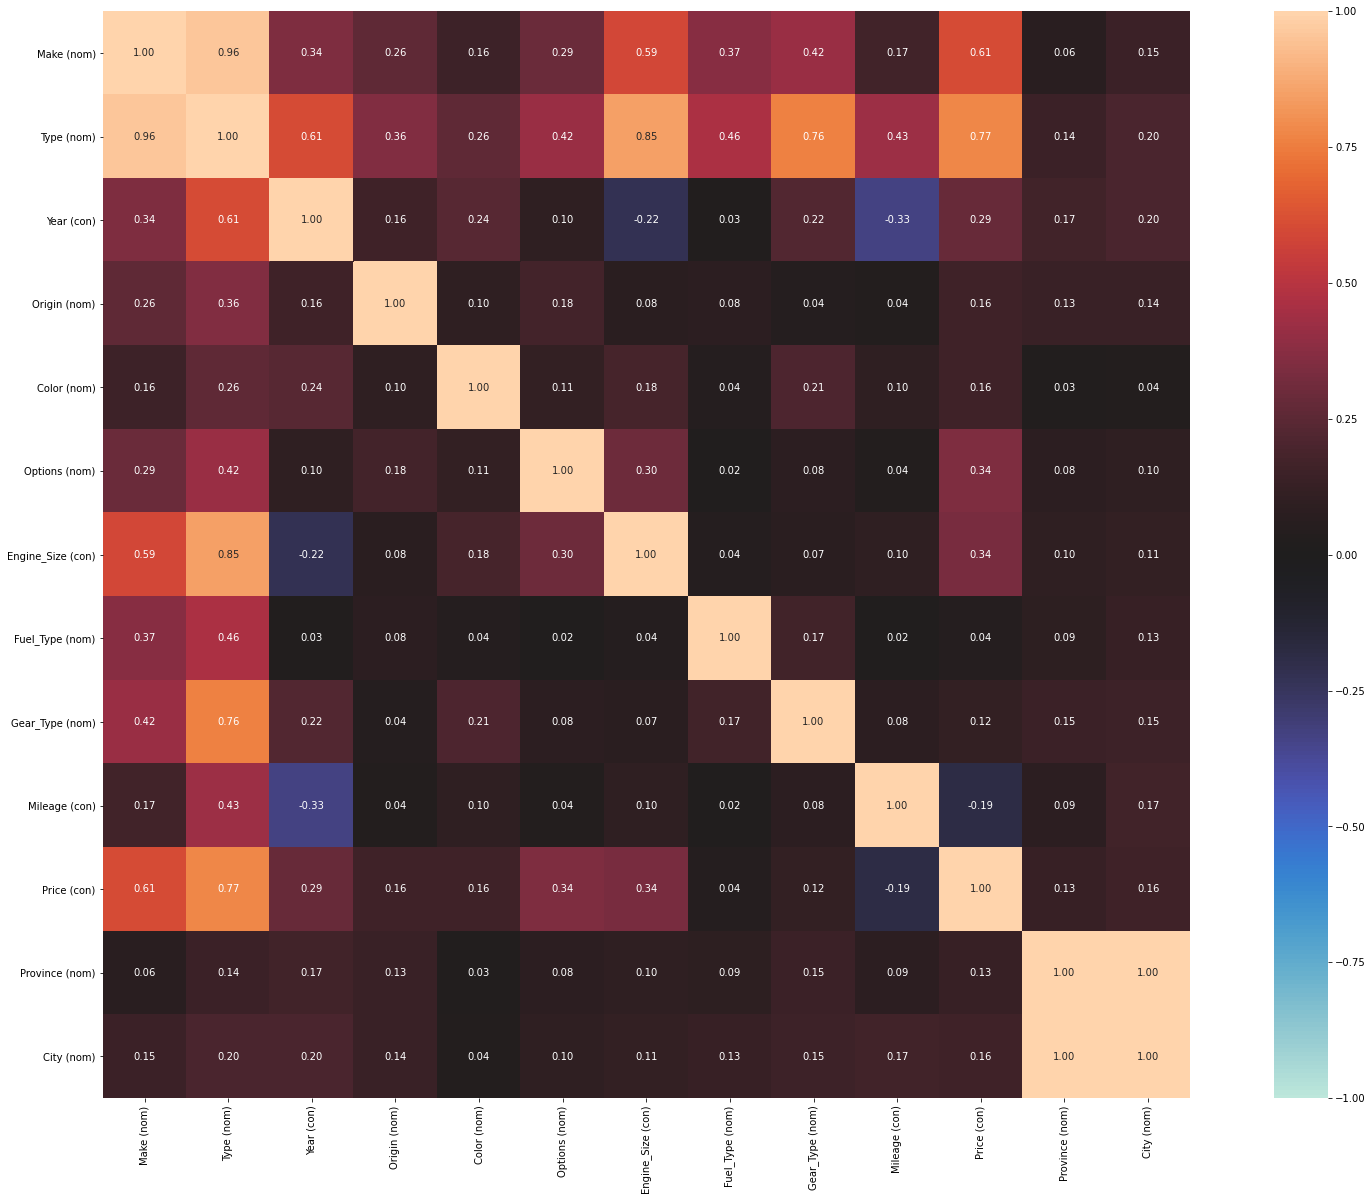

In [51]:
#visulize the correlation between all attributes
nominal.associations(df,figsize=(30,20),mark_columns=True);


#refrences:https://www.kaggle.com/questions-and-answers/181332

In [52]:
#converting categorical features into 1s and 0s
def cat_dummies (df,col,pre):
    df = df.copy()
    for c,p in zip(col,pre):
        dummies = pd.get_dummies(df[c], prefix=p)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(c, axis=1)
    return df

In [53]:
df_full = cat_dummies (
df , ['Make','Type','Origin','Color','Options','Fuel_Type','Gear_Type','Province','City'],
     ['Make','Type','Origin','Color','Options','Fuel','Gear','Province','City'])

In [54]:
df_full.shape

(4404, 476)

# MODEL

In [55]:
X, y = make_regression(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [56]:
X = df_full.drop('Price', axis=1)
y = df_full.loc [:,'Price']

In [57]:
scaler = StandardScaler ()
X = scaler.fit_transform(X)

X

array([[ 5.77072775e-01,  1.75889144e+00, -1.59231934e-01, ...,
        -1.03861634e-01, -1.50704305e-02, -5.64718165e-02],
       [ 7.90817813e-01, -1.07149380e+00, -3.24551094e-01, ...,
        -1.03861634e-01, -1.50704305e-02, -5.64718165e-02],
       [ 7.90817813e-01, -1.00410368e+00, -9.89360111e-02, ...,
        -1.03861634e-01, -1.50704305e-02, -5.64718165e-02],
       ...,
       [ 1.00456285e+00, -4.64982679e-01, -5.53852909e-01, ...,
        -1.03861634e-01,  6.63551053e+01, -5.64718165e-02],
       [-6.41623388e-02,  2.09584206e+00,  4.51619713e-01, ...,
        -1.03861634e-01, -1.50704305e-02, -5.64718165e-02],
       [ 5.77072775e-01, -1.00410368e+00, -6.52237865e-01, ...,
        -1.03861634e-01, -1.50704305e-02, -5.64718165e-02]])

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=.8, random_state=32)

----------------------------------------------------------------------------------------------------------------------

### Linear Regression

In [59]:
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)
lin_model_predictions = lin_model.predict(X_test)

In [60]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, lin_model_predictions), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, lin_model_predictions), 2)) 
print("Root Mean squared error =", round(np.sqrt(mean_squared_error(y_test, lin_model_predictions)),2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, lin_model_predictions), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, lin_model_predictions), 2)) 
print("R2 score =", round(sm.r2_score(y_test, lin_model_predictions), 2))

Mean absolute error = 6.014811170313652e+17
Mean squared error = 2.1733360091630853e+37
Root Mean squared error = 4.661905199768744e+18
Median absolute error = 12520.0
Explain variance score = -3.005927248569663e+27
R2 score = -3.019865590866434e+27


### Boosting

In [61]:
reg_model = GradientBoostingRegressor(max_depth=5,n_estimators=100)
reg_model.fit(X_train, y_train)
reg_model_predictions = reg_model.predict(X_test)

In [62]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, reg_model_predictions), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, reg_model_predictions), 2)) 
print("Root Mean squared error =", round(np.sqrt(mean_squared_error(y_test, reg_model_predictions)),2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, reg_model_predictions), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, reg_model_predictions), 2)) 
print("R2 score =", round(sm.r2_score(y_test, reg_model_predictions), 2))

Mean absolute error = 17667.08
Mean squared error = 1525865539.93
Root Mean squared error = 39062.33
Median absolute error = 9049.94
Explain variance score = 0.79
R2 score = 0.79


In [63]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

xg_reg_model = xgb.XGBRegressor(objective ='reg:linear', max_depth=5, n_estimators = 100)
xg_reg_model.fit(X_train,y_train)
xg_reg_model_predictions = xg_reg_model.predict(X_test)

[05:01:40] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [64]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, xg_reg_model_predictions), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, xg_reg_model_predictions), 2)) 
print("Root Mean squared error =", round(np.sqrt(mean_squared_error(y_test, xg_reg_model_predictions)),2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, xg_reg_model_predictions), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, xg_reg_model_predictions), 2)) 
print("R2 score =", round(sm.r2_score(y_test, xg_reg_model_predictions), 2))

Mean absolute error = 16116.86
Mean squared error = 1167669525.89
Root Mean squared error = 34171.18
Median absolute error = 8644.36
Explain variance score = 0.84
R2 score = 0.84


In [65]:
lgb_model = lgb.LGBMRegressor(boosting_type='gbdt',objective='regression' , n_estimators = 100)
lgb_model.fit(X_train,y_train)
lgb_model_predictions = lgb_model.predict(X_test)

In [66]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, lgb_model_predictions), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, lgb_model_predictions), 2)) 
print("Root Mean squared error =", round(np.sqrt(mean_squared_error(y_test, lgb_model_predictions)),2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, lgb_model_predictions), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, lgb_model_predictions), 2)) 
print("R2 score =", round(sm.r2_score(y_test, lgb_model_predictions), 2))

Mean absolute error = 18814.41
Mean squared error = 1967576255.71
Root Mean squared error = 44357.37
Median absolute error = 8930.38
Explain variance score = 0.73
R2 score = 0.73


## Adjusments

In [67]:
df_less = df.drop(['Type','City','Year'], axis=1)

In [68]:
df_less = cat_dummies (
df_less , ['Make','Origin','Color','Options','Fuel_Type','Gear_Type','Province'],
     ['Make','Origin','Color','Options','Fuel','Gear','Province'])

In [69]:
df_less.shape

(4404, 98)

In [70]:
X_less = df_less.drop('Price', axis=1)
y_less = df_less.loc [:,'Price']

In [71]:
scaler_less = StandardScaler ()
X_less = scaler.fit_transform(X_less)

X_less

array([[ 1.75889144, -0.15923193, -0.02610868, ..., -0.05003982,
         1.17880541, -0.10160447],
       [-1.0714938 , -0.32455109, -0.02610868, ..., -0.05003982,
         1.17880541, -0.10160447],
       [-1.00410368, -0.09893601, -0.02610868, ..., -0.05003982,
         1.17880541, -0.10160447],
       ...,
       [-0.46498268, -0.55385291, -0.02610868, ..., -0.05003982,
         1.17880541, -0.10160447],
       [ 2.09584206,  0.45161971, -0.02610868, ..., -0.05003982,
        -0.84831643, -0.10160447],
       [-1.00410368, -0.65223787, -0.02610868, ..., -0.05003982,
        -0.84831643, -0.10160447]])

In [72]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_less,y_less,train_size=.7, random_state=32)

### Linear Regression

In [73]:
lin_model2 = LinearRegression()
lin_model2.fit(X_train2,y_train2)
lin_model_predictions2 = lin_model2.predict(X_test2)

In [74]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test2, lin_model_predictions2), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test2, lin_model_predictions2), 2)) 
print("Root Mean squared error =", round(np.sqrt(mean_squared_error(y_test2, lin_model_predictions2)),2))
print("Median absolute error =", round(sm.median_absolute_error(y_test2, lin_model_predictions2), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test2, lin_model_predictions2), 2)) 
print("R2 score =", round(sm.r2_score(y_test2, lin_model_predictions2), 2))

Mean absolute error = 2.344747303625326e+16
Mean squared error = 1.6227967135385517e+35
Root Mean squared error = 4.0283951066628896e+17
Median absolute error = 20490.0
Explain variance score = -2.601537354555921e+25
R2 score = -2.610381011191642e+25


### Boosting

In [75]:
reg_model2 = GradientBoostingRegressor(max_depth=5,n_estimators=100)
reg_model2.fit(X_train2, y_train2)
reg_model_predictions2 = reg_model2.predict(X_test2)

In [76]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test2, reg_model_predictions2), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test2, reg_model_predictions2), 2)) 
print("Root Mean squared error =", round(np.sqrt(mean_squared_error(y_test2, reg_model_predictions2)),2))
print("Median absolute error =", round(sm.median_absolute_error(y_test2, reg_model_predictions2), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test2, reg_model_predictions2), 2)) 
print("R2 score =", round(sm.r2_score(y_test2, reg_model_predictions2), 2))

Mean absolute error = 24453.49
Mean squared error = 2304968941.63
Root Mean squared error = 48010.09
Median absolute error = 13626.05
Explain variance score = 0.63
R2 score = 0.63


In [77]:
data_dmatrix2 = xgb.DMatrix(data=X_less,label=y_less)

xg_reg_model2 = xgb.XGBRegressor(objective ='reg:linear', max_depth=5, n_estimators = 100)
xg_reg_model2.fit(X_train2,y_train2)
xg_reg_model_predictions2 = xg_reg_model2.predict(X_test2)

[05:01:44] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [78]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test2, xg_reg_model_predictions2), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test2, xg_reg_model_predictions2), 2)) 
print("Root Mean squared error =", round(np.sqrt(mean_squared_error(y_test2, xg_reg_model_predictions2)),2))
print("Median absolute error =", round(sm.median_absolute_error(y_test2, xg_reg_model_predictions2), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test2, xg_reg_model_predictions2), 2)) 
print("R2 score =", round(sm.r2_score(y_test2, xg_reg_model_predictions2), 2))

Mean absolute error = 24229.61
Mean squared error = 2252585841.39
Root Mean squared error = 47461.41
Median absolute error = 13072.29
Explain variance score = 0.64
R2 score = 0.64


In [79]:
lgb_model2 = lgb.LGBMRegressor(boosting_type='gbdt',objective='regression' , n_estimators = 100)
lgb_model2.fit(X_train2,y_train2)
lgb_model_predictions2 = lgb_model2.predict(X_test2)

In [80]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test2, lgb_model_predictions2), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test2, lgb_model_predictions2), 2)) 
print("Root Mean squared error =", round(np.sqrt(mean_squared_error(y_test2, lgb_model_predictions2)),2))
print("Median absolute error =", round(sm.median_absolute_error(y_test2, lgb_model_predictions2), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test2, lgb_model_predictions2), 2)) 
print("R2 score =", round(sm.r2_score(y_test2, lgb_model_predictions2), 2))

Mean absolute error = 25195.39
Mean squared error = 2324787831.52
Root Mean squared error = 48216.05
Median absolute error = 13987.44
Explain variance score = 0.63
R2 score = 0.63
